In [1]:
from PIL import Image, ImageDraw, ImageOps, ImageFilter
import os
from matplotlib.pyplot import imshow
import random

In [2]:
raw_dir = "./character-icons/raw"
raw_images = os.listdir(raw_dir)

In [3]:
def empty_dir(folder):
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)

In [4]:
empty_dir("./character-icons/generated-red")
empty_dir("./character-icons/generated-blue")

# Generate minimap icons

In [5]:
def mini_icon(file):
    im = Image.open(f"{raw_dir}/{file}")
#     im = im.resize((14,14), resample=Image.BILINEAR)
    mask = Image.open('./character-icons/mask-lg.png').convert('L')
    output = ImageOps.fit(im, mask.size, centering=(0.5, 0.5))
    output.putalpha(mask)

    red_icon = Image.open('./character-icons/bg-red-lg.png')
    red_icon.paste(output, (0,0), mask=output)
    
    blue_icon = Image.open('./character-icons/bg-blue-lg.png')
    blue_icon.paste(output, (0,0), mask=output)
    return red_icon.resize((14,14), resample=Image.BILINEAR), blue_icon.resize((14,14), resample=Image.BILINEAR)

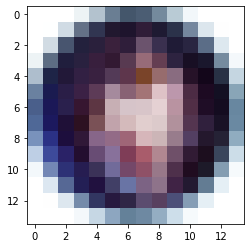

In [6]:
res = mini_icon("Ahri.png")
imshow(res[1])

In [7]:
for img in raw_images:
    res = mini_icon(img)
    res[0].save(f'./character-icons/generated-red/red-{img}')
    res[1].save(f'./character-icons/generated-blue/blue-{img}')

In [8]:
os.listdir("./")

['.git',
 'locator',
 'capture.py',
 'nb_locator.ipynb',
 'games_collected',
 'fastai_commands.txt',
 'minimap',
 '.ipynb_checkpoints',
 'venv',
 'nb_predicter.ipynb',
 'rename.py',
 'nb_minimap.ipynb',
 'models',
 'nb_generator.ipynb',
 '.gitignore',
 'logs',
 'nb_utilities.ipynb',
 'games',
 'character-icons',
 '.idea',
 'resize.py']

# Generate 30x30 images with known team  icons

In [9]:
terrain_dir = "./locator/newdata/train/terrain"
terrain_files = os.listdir(terrain_dir)

## Generate splits with all heroes

In [10]:
def mini_split(char_dir, characters, terrains):
    map_img = Image.open(f"{terrain_dir}/{random.choice(terrains)}")
    char_img = Image.open(f"{char_dir}/{random.choice(characters)}")
    x = random.randint(4, 12)
    y = random.randint(4, 12)
    map_img.paste(char_img, (x, y), mask=char_img)
    return map_img


def mini_split_blue_red(char_dir, characters, terrains):
    map_img = Image.open(f"{terrain_dir}/{random.choice(terrains)}")
    has_red = False
    has_blue = False
    for i in range(0, random.randint(2, 3)):
        if i % 2 == 0:
           d =  "./character-icons/generated-blue"
        else:
           d = "./character-icons/generated-red"
    
        characters = os.listdir(d)
        char_img = Image.open(f"{d}/{random.choice(characters)}")
        x = random.randint(4, 12)
        y = random.randint(4, 12)
        map_img.paste(char_img, (x, y), mask=char_img)
    return map_img

In [11]:
num = 60000

char_dir = "./character-icons/generated-red"
for i in range(num):
    res = mini_split(char_dir, os.listdir(char_dir), terrain_files)
    res.save(f"./character-icons/split-red/gen-{i}.png")  
    
char_dir = "./character-icons/generated-blue"
for i in range(num):
    res = mini_split(char_dir, os.listdir(char_dir), terrain_files)
    res.save(f"./character-icons/split-blue/gen-{i}.png") 

for i in range(num):
    res = mini_split_blue_red(char_dir, os.listdir(char_dir), terrain_files)
    res.save(f"./character-icons/split-blue-red/gen-{i}.png")

## Generate splits for hard to identify heroes

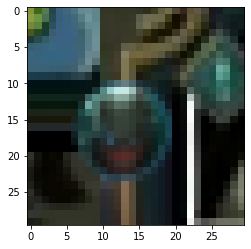

In [12]:
difficult_chars = [
    ("generated-blue", "split-blue", "blue-Pyke.png"),
]
num = 100
def char_split(char_dir, character, terrains):
    map_img = Image.open(f"{terrain_dir}/{random.choice(terrains)}")
    char_img = Image.open(f"./character-icons/{char_dir}/{character}")
    x = random.randint(4,12)
    y = random.randint(4,12)
    map_img.paste(char_img, (x,y), mask=char_img)
    return map_img
    
char_dir = "./character-icons/generated-blue"
for c in difficult_chars:
    for i in range(num):
        res = char_split(c[0], c[2], terrain_files)
        imshow(res)
        res.save(f"./character-icons/{c[1]}/gen-diff-{i}.png") 


## Move files to the actual train directory

In [13]:
empty_dirs = [
    "./locator/newdata/valid/red",
    "./locator/newdata/valid/blue",
    "./locator/newdata/valid/blue-red",
    "./locator/newdata/train/red",
    "./locator/newdata/train/blue",
    "./locator/newdata/train/blue-red",
             ]
for d in empty_dirs:
    for img in os.listdir(d):
        if "gen" in img:
            os.remove(f"{d}/{img}")

In [14]:
for img in os.listdir("./character-icons/split-red"):
    os.rename(f"./character-icons/split-red/{img}", f"./locator/newdata/train/red/{img}")
for img in os.listdir("./character-icons/split-blue"):
    os.rename(f"./character-icons/split-blue/{img}", f"./locator/newdata/train/blue/{img}")
for img in os.listdir("./character-icons/split-blue-red"):
    os.rename(f"./character-icons/split-blue-red/{img}", f"./locator/newdata/train/blue-red/{img}")

## Move valid images back to train

In [15]:
for img in os.listdir("./locator/newdata/valid/red"):
    os.rename(f"./locator/newdata/valid/red/{img}", f"./locator/newdata/train/red/{img}")
for img in os.listdir("./locator/newdata/valid/blue"):
    os.rename(f"./locator/newdata/valid/blue/{img}", f"./locator/newdata/train/blue/{img}")
for img in os.listdir("./locator/newdata/valid/blue-red"):
    os.rename(f"./locator/newdata/valid/blue-red/{img}", f"./locator/newdata/train/blue-red/{img}")